In [97]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

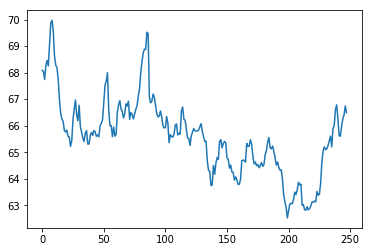

In [70]:
history = pd.read_excel("RC_F31_08_2018_T31_08_2019.xlsx")
plt.plot(history["curs"]) # Currency exchange rate 2018 - 2019

In [73]:
history[0:20]

,nominal,data,curs,cdx
0,1,2018-08-31,68.0821,Доллар США
1,1,2018-09-01,68.0447,Доллар США
2,1,2018-09-04,67.7443,Доллар США
3,1,2018-09-05,68.2737,Доллар США
4,1,2018-09-06,68.4628,Доллар США
5,1,2018-09-07,68.2505,Доллар США
6,1,2018-09-08,69.0286,Доллар США
7,1,2018-09-11,69.8685,Доллар США
8,1,2018-09-12,69.9744,Доллар США
9,1,2018-09-13,69.5728,Доллар США


In [51]:
past = 7 * 4 # take the last 4 weeks and predict the next week
future = 7 

In [52]:
values = history["curs"]

In [53]:
start = past
end = len(values) - future
df_raw = [] # making and fill raw dataframe

for i in range(start, end):
    past_and_future_value = values[(i - past):(i + future)]
    df_raw.append(list(past_and_future_value))

In [54]:
past_column = [f"past {i}" for i in range(past)]
future_column = [f"future {i}" for i in range(future)]

In [55]:
df = pd.DataFrame(df_raw, columns = (past_column + future_column)) # making dataframe

In [56]:
X = df[past_column][:-1] # data for making predictions
Y = df[future_column][:-1] # data need to predict

In [57]:
X_test = df[past_column][-1:] 
Y_test = df[future_column][-1:] #test data

In [58]:
lin_reg = LinearRegression()

In [60]:
lin_reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
prediction = lin_reg.predict(X_test)[0]
prediction

array([66.64258291, 66.66840227, 66.63204202, 66.60888578, 66.54454473,
       66.43533017, 66.38298564])

In [63]:
np.linalg.norm(Y_test - prediction)

1.7079297573969794

In [66]:
Y_test_list = np.array([list(Y_test.iloc[0])])
Prediction_list = np.array([prediction])

In [74]:
# mean absolute error
sklearn.metrics.mean_absolute_error(Y_test_list, Prediction_list)

0.5373860349916129

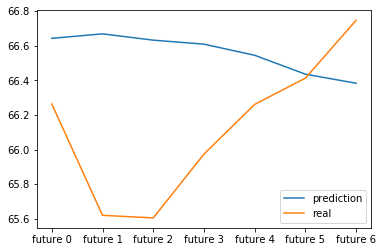

In [77]:
plt.plot(prediction, label = "prediction")
plt.plot(Y_test.iloc[0], label = "real")
plt.legend()

In [551]:
'''
Now lets try out a K nearest neighbors algorithm,
and compare results
'''
KNN = KNeighborsRegressor(n_neighbors = 1)
KNN.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

In [552]:
prediction = KNN.predict(X_test)[0]

In [553]:
Y_test_list = np.array([list(Y_test.iloc[0])])
Prediction_list = np.array([prediction])

In [554]:
# mean absolute error
sklearn.metrics.mean_absolute_error(Y_test_list, Prediction_list)

0.33169999999999994

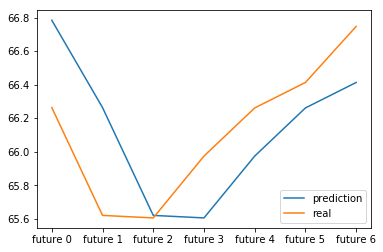

In [555]:
plt.plot(prediction, label = "prediction")
plt.plot(Y_test.iloc[0], label = "real")
plt.legend()
''' 
KNN algorithm is pretty good for stable currencies
Lower K == higher accuracy, because neighbors it's values of currencies in several past days 
'''

In [545]:
'''
MLP - multi-layer perceptron regressor

Need some setting up before prediction
'''
MLP = MLPRegressor(activation='relu', max_iter = 4000, alpha = 100, hidden_layer_sizes=50, random_state=3, 
                   learning_rate_init=0.001, learning_rate='adaptive')

In [546]:
MLP.fit(X, Y)

MLPRegressor(activation='relu', alpha=100, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=50, learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=4000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=3, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [547]:
prediction = MLP.predict(X_test)[0]

In [548]:
Y_test_list = np.array([list(Y_test.iloc[0])])
Prediction_list = np.array([prediction])

In [549]:
# mean absolute error
sklearn.metrics.mean_absolute_error(Y_test_list, Prediction_list)

0.981692643488805

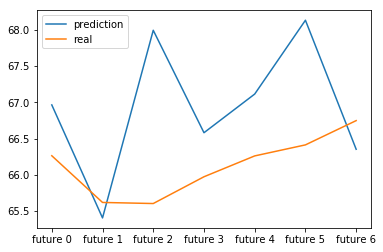

In [550]:
plt.plot(prediction, label = "prediction")
plt.plot(Y_test.iloc[0], label = "real")
plt.legend()